In [169]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [3]:
srcPath = '../data/image/lena.png'

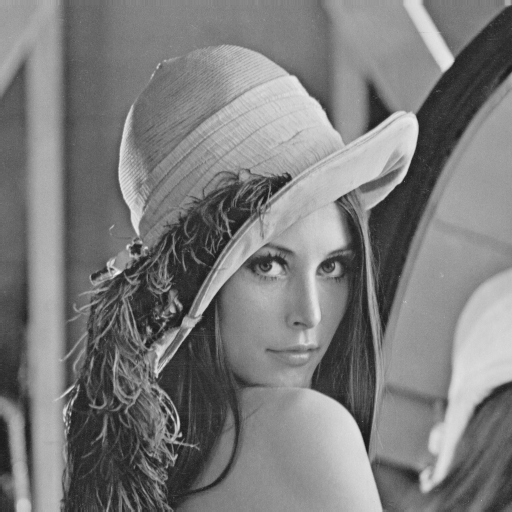

In [170]:
srcBgr = cv2.imread(srcPath)
gray = cv2.cvtColor(srcBgr, cv2.COLOR_BGR2GRAY)
#srcRgb = cv2.cvtColor(srcBgr, cv2.COLOR_BGR2RGB)
Image.fromarray(gray)

# Histogram of image

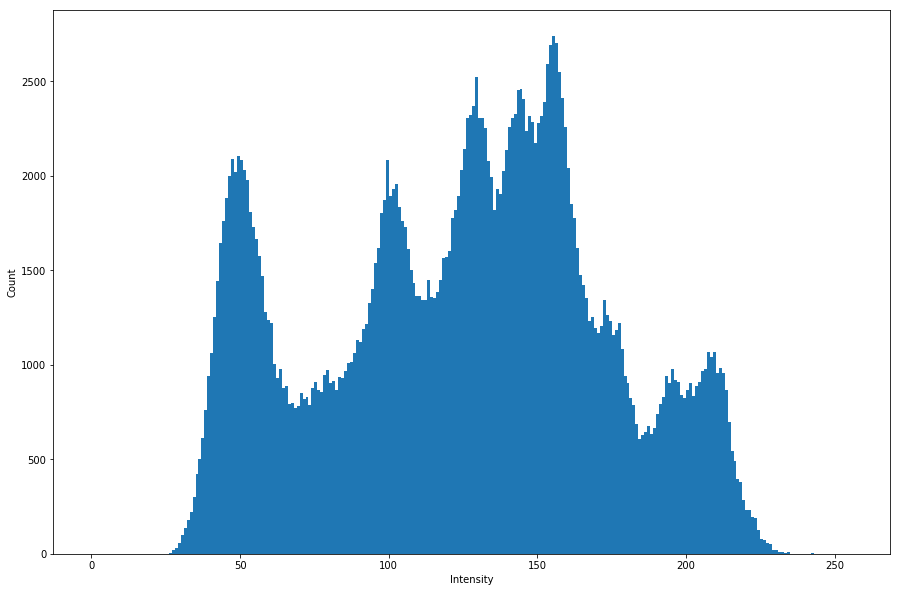

In [171]:
plt.hist(gray.ravel(),256,[0,256])
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.show()

### Normalization to [-1, 1]

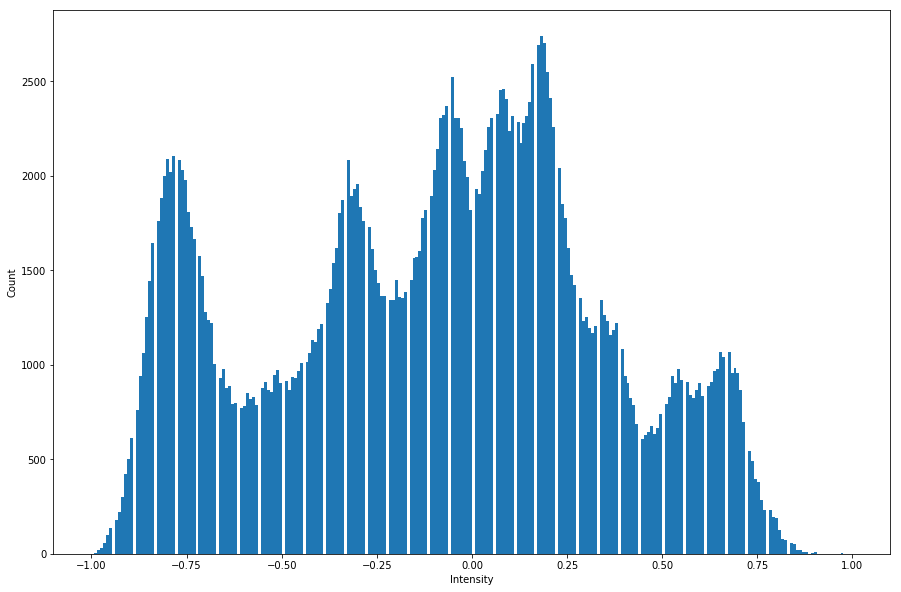

In [172]:
normGray = cv2.normalize(gray, None, alpha=-1, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.hist(normGray.ravel(),256,[-1,1])
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.show()

### RMS(standard deviation)

In [187]:
np.std(normGray)

0.43505087

### Decrease image RMS

Make the mean intensity to be zero.
And then alter the standard deviation to be 0.2.

In [219]:
normStarndardNormGray = normGray - np.mean(normGray) 
np.mean(normStarndardNormGray)

1.0244548e-08

In [220]:
# Alter the standard deviation to 1.
normStarndardNormGray = normStarndardNormGray / np.std(normStarndardNormGray)
np.std(normStarndardNormGray)

1.0

In [221]:
# Alter the standard deviation to 0.2.
normStarndardNormGray = normStarndardNormGray * 0.2
np.std(normStarndardNormGray)

0.2

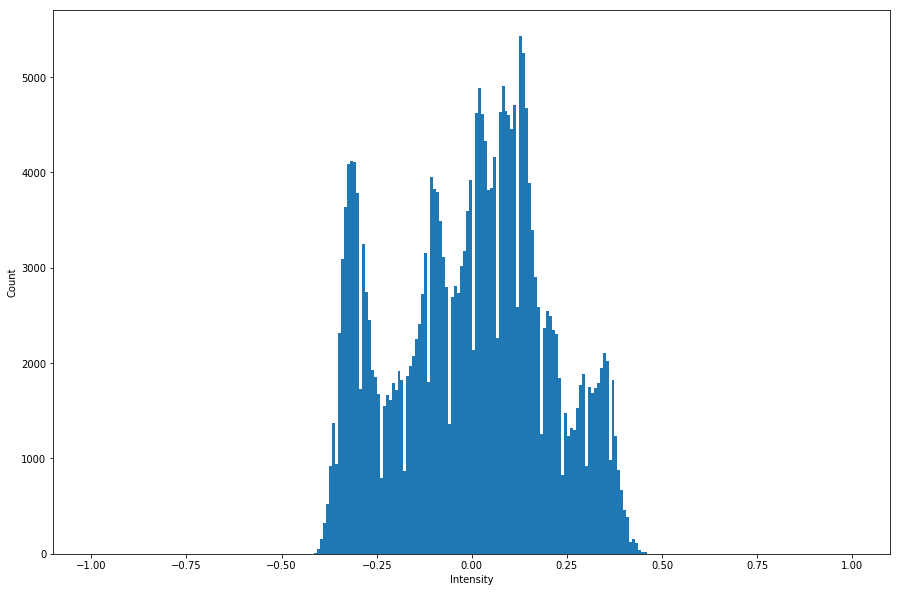

In [222]:
plt.hist(normStarndardNormGray.ravel(),256,[-1,1])
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.show()

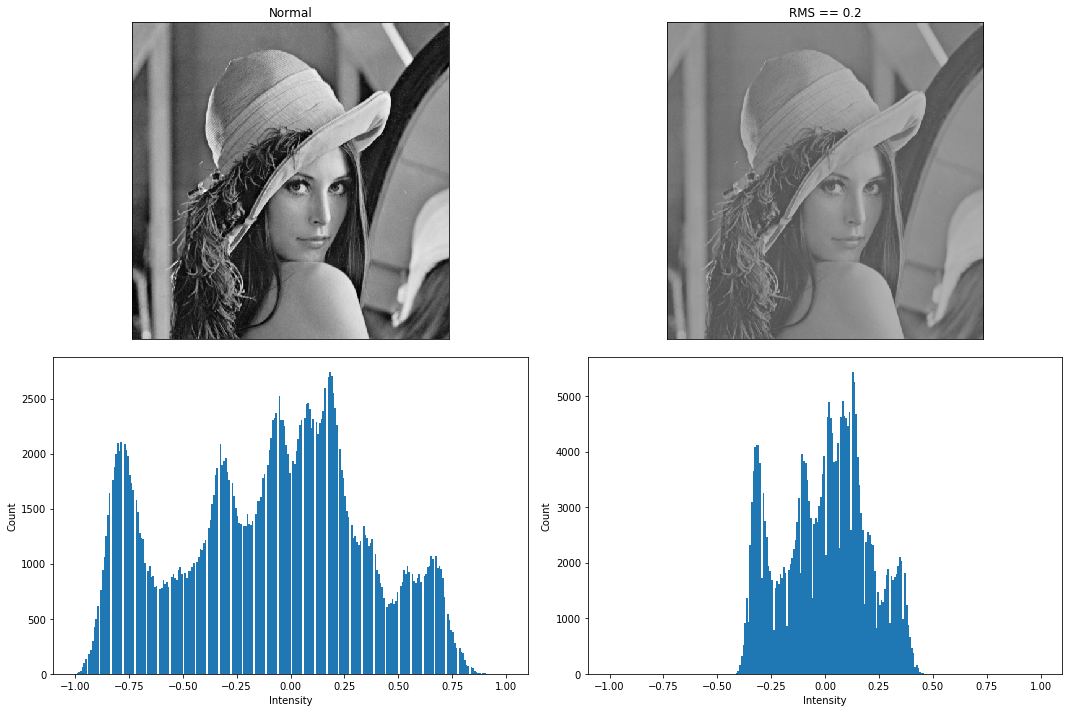

In [231]:
# plt.imshow は勝手にarrayを正規化するためmin,maxを設定
plt.subplot(2, 2, 1)
plt.imshow(normGray, cmap='gray', vmin = -1, vmax = 1)
plt.title('Normal')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 2)
plt.imshow(normStarndardNormGray, cmap='gray', vmin = -1, vmax = 1)
plt.title('RMS == 0.2')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 3)
plt.hist(normGray.ravel(),256,[-1,1])
plt.xlabel('Intensity')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.hist(normStarndardNormGray.ravel(),256,[-1,1])
plt.xlabel('Intensity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

####  Margin of Float type error
    
$ 0.00000000000000000000000001101101001 = 1.101101001 * 2^{-26} $

1.101101001 → 仮数    
-26 → 指数    
![float](../data/image/float.png)

In [113]:
type(normGray[0,0])

numpy.float32

In [117]:
# Accuracy
2**23

8388608

# Converting to frequency space

Fast Fourier Transform

2次元ユークリッド空間の直交座標系画像を極座標系に変換(フーリエ変換)

In [351]:
# convert to frequency domain
normGrayFft = np.fft.fft2(normGray)
normGrayFftShift = np.fft.fftshift(normGrayFft)

# 表示のため
# calculate amplitude spectrum
# 第1象限と第3象限、第1象限と第4象限を入れ替え
grayShift = np.fft.fftshift(np.abs(normGrayFft))
grayShiftDisp = np.log(grayShift + 0.0001)
normGrayShiftDisp = cv2.normalize(grayShiftDisp, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

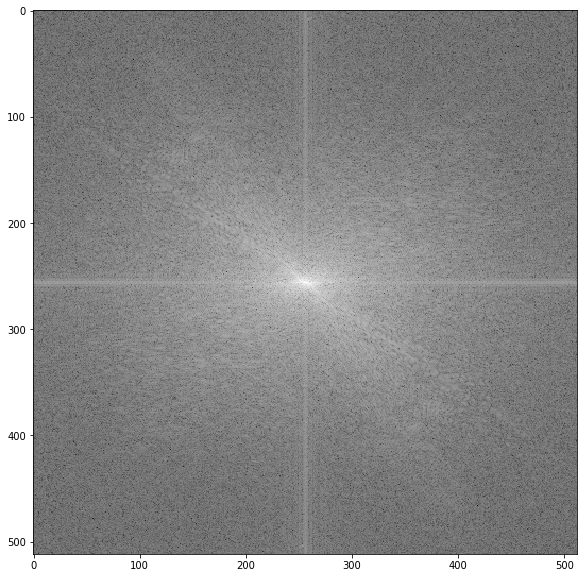

In [352]:
plt.imshow(normGrayShiftDisp, cmap='gray', vmin = 0, vmax = 1)

## Low-pass filter

高周波を除く

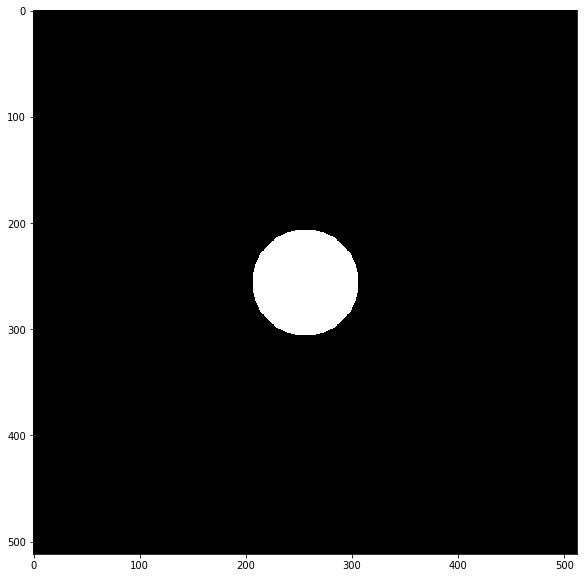

In [353]:
srcSize = gray.shape
center = (srcSize[0]//2,srcSize[1]//2)
# initializer filter
lpFilter = np.zeros(fSize)
filterRadius = 50

for x in range(0,srcSize[0]):
    for y in range(0,srcSize[1]):
        if(x-center[0])**2 + (y-center[1])**2 < filterRadius**2:
            lpFilter[x,y] = 1
plt.imshow(lpFilter, cmap='gray', vmin = 0, vmax = 1)

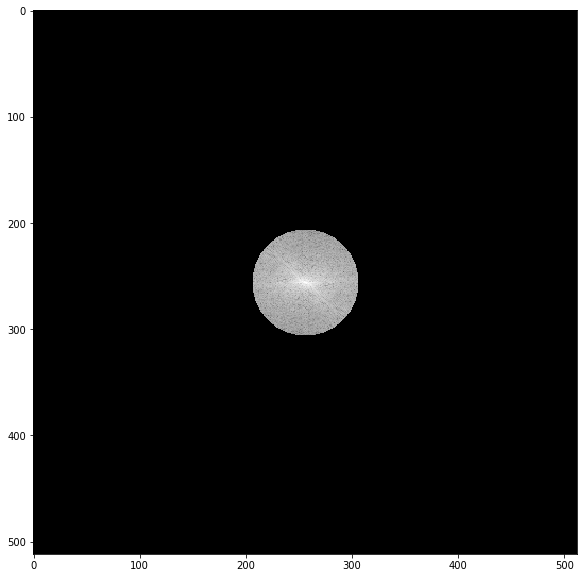

In [354]:
lpRes = normGrayFftShift*lpFilter

# 表示のため
plt.imshow(normGrayShiftDisp*lpFilter, cmap='gray', vmin = 0, vmax = 1)

In [364]:
# Inverse Fourier Transform
grayConvert = np.real(np.fft.ifft2(np.fft.ifftshift(lpRes)))
normGrayConvertLp = cv2.normalize(grayConvert, None, alpha=-1, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

plt.subplot(1, 2, 1)
plt.imshow(normGray, cmap='gray', vmin = -1, vmax = 1)
plt.title('Normal')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(normGrayConvertLp, cmap='gray', vmin = -1, vmax = 1)
plt.title('Low-pass filter')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

## High-pass filter

低周波を除く

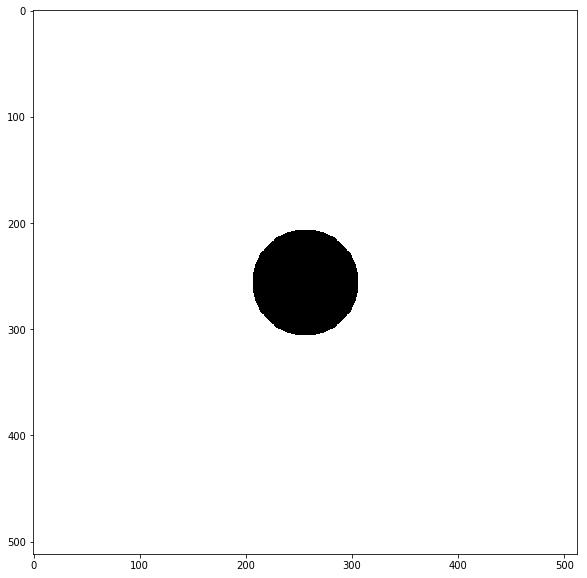

In [361]:
srcSize = gray.shape
center = (srcSize[0]//2,srcSize[1]//2)
# initializer filter
hpFilter = np.ones(fSize)
filterRadius = 50

for x in range(0,srcSize[0]):
    for y in range(0,srcSize[1]):
        if(x-center[0])**2 + (y-center[1])**2 < filterRadius**2:
            hpFilter[x,y] = 0
plt.imshow(hpFilter, cmap='gray', vmin = 0, vmax = 1)

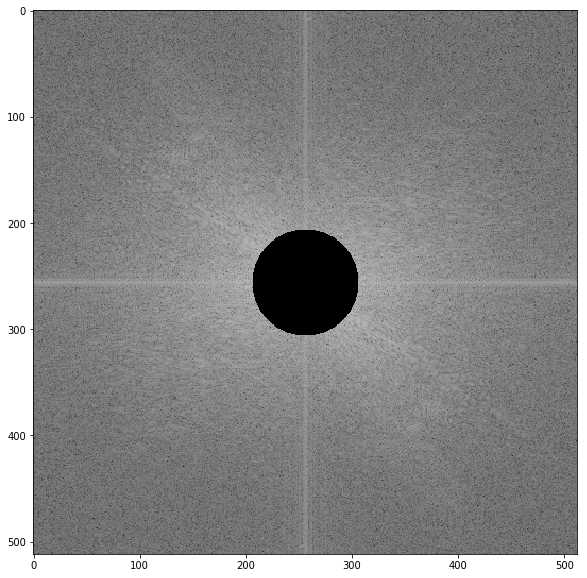

In [362]:
hpRes = normGrayFftShift*hpFilter

# 表示のため
plt.imshow(normGrayShiftDisp*hpFilter, cmap='gray', vmin = 0, vmax = 1)

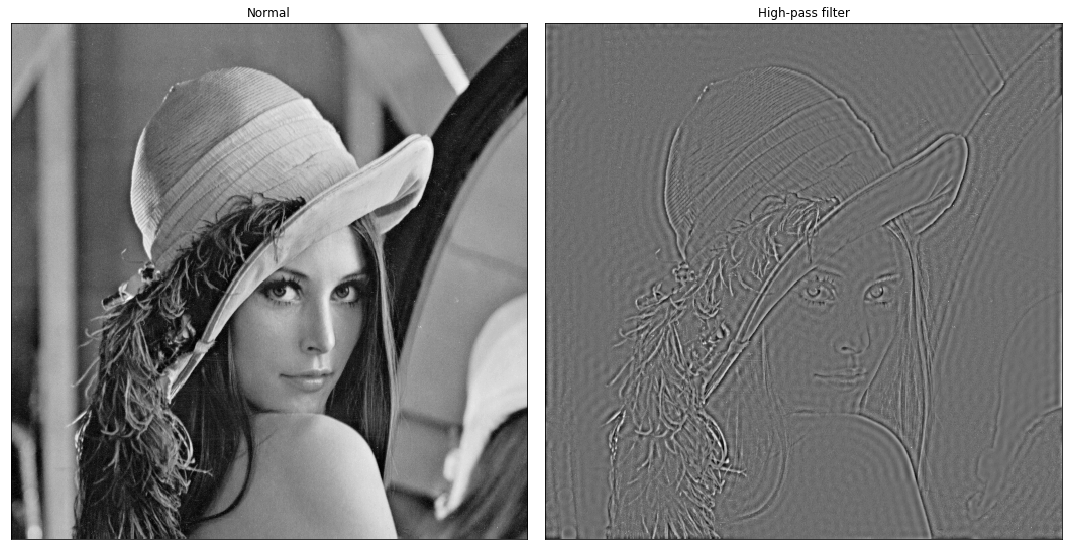

In [363]:
# Inverse Fourier Transform
grayConvert = np.real(np.fft.ifft2(np.fft.ifftshift(hpRes)))
normGrayConvertHp = cv2.normalize(grayConvert, None, alpha=-1, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

plt.subplot(1, 2, 1)
plt.imshow(normGray, cmap='gray', vmin = -1, vmax = 1)
plt.title('Normal')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(normGrayConvertHp, cmap='gray', vmin = -1, vmax = 1)
plt.title('High-pass filter')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

In [365]:
plt.subplot(1, 3, 1)
plt.imshow(normGray, cmap='gray', vmin = -1, vmax = 1)
plt.title('Normal')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(normGrayConvertLp, cmap='gray', vmin = -1, vmax = 1)
plt.title('Low-pass filter')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(normGrayConvertHp, cmap='gray', vmin = -1, vmax = 1)
plt.title('High-pass filter')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()